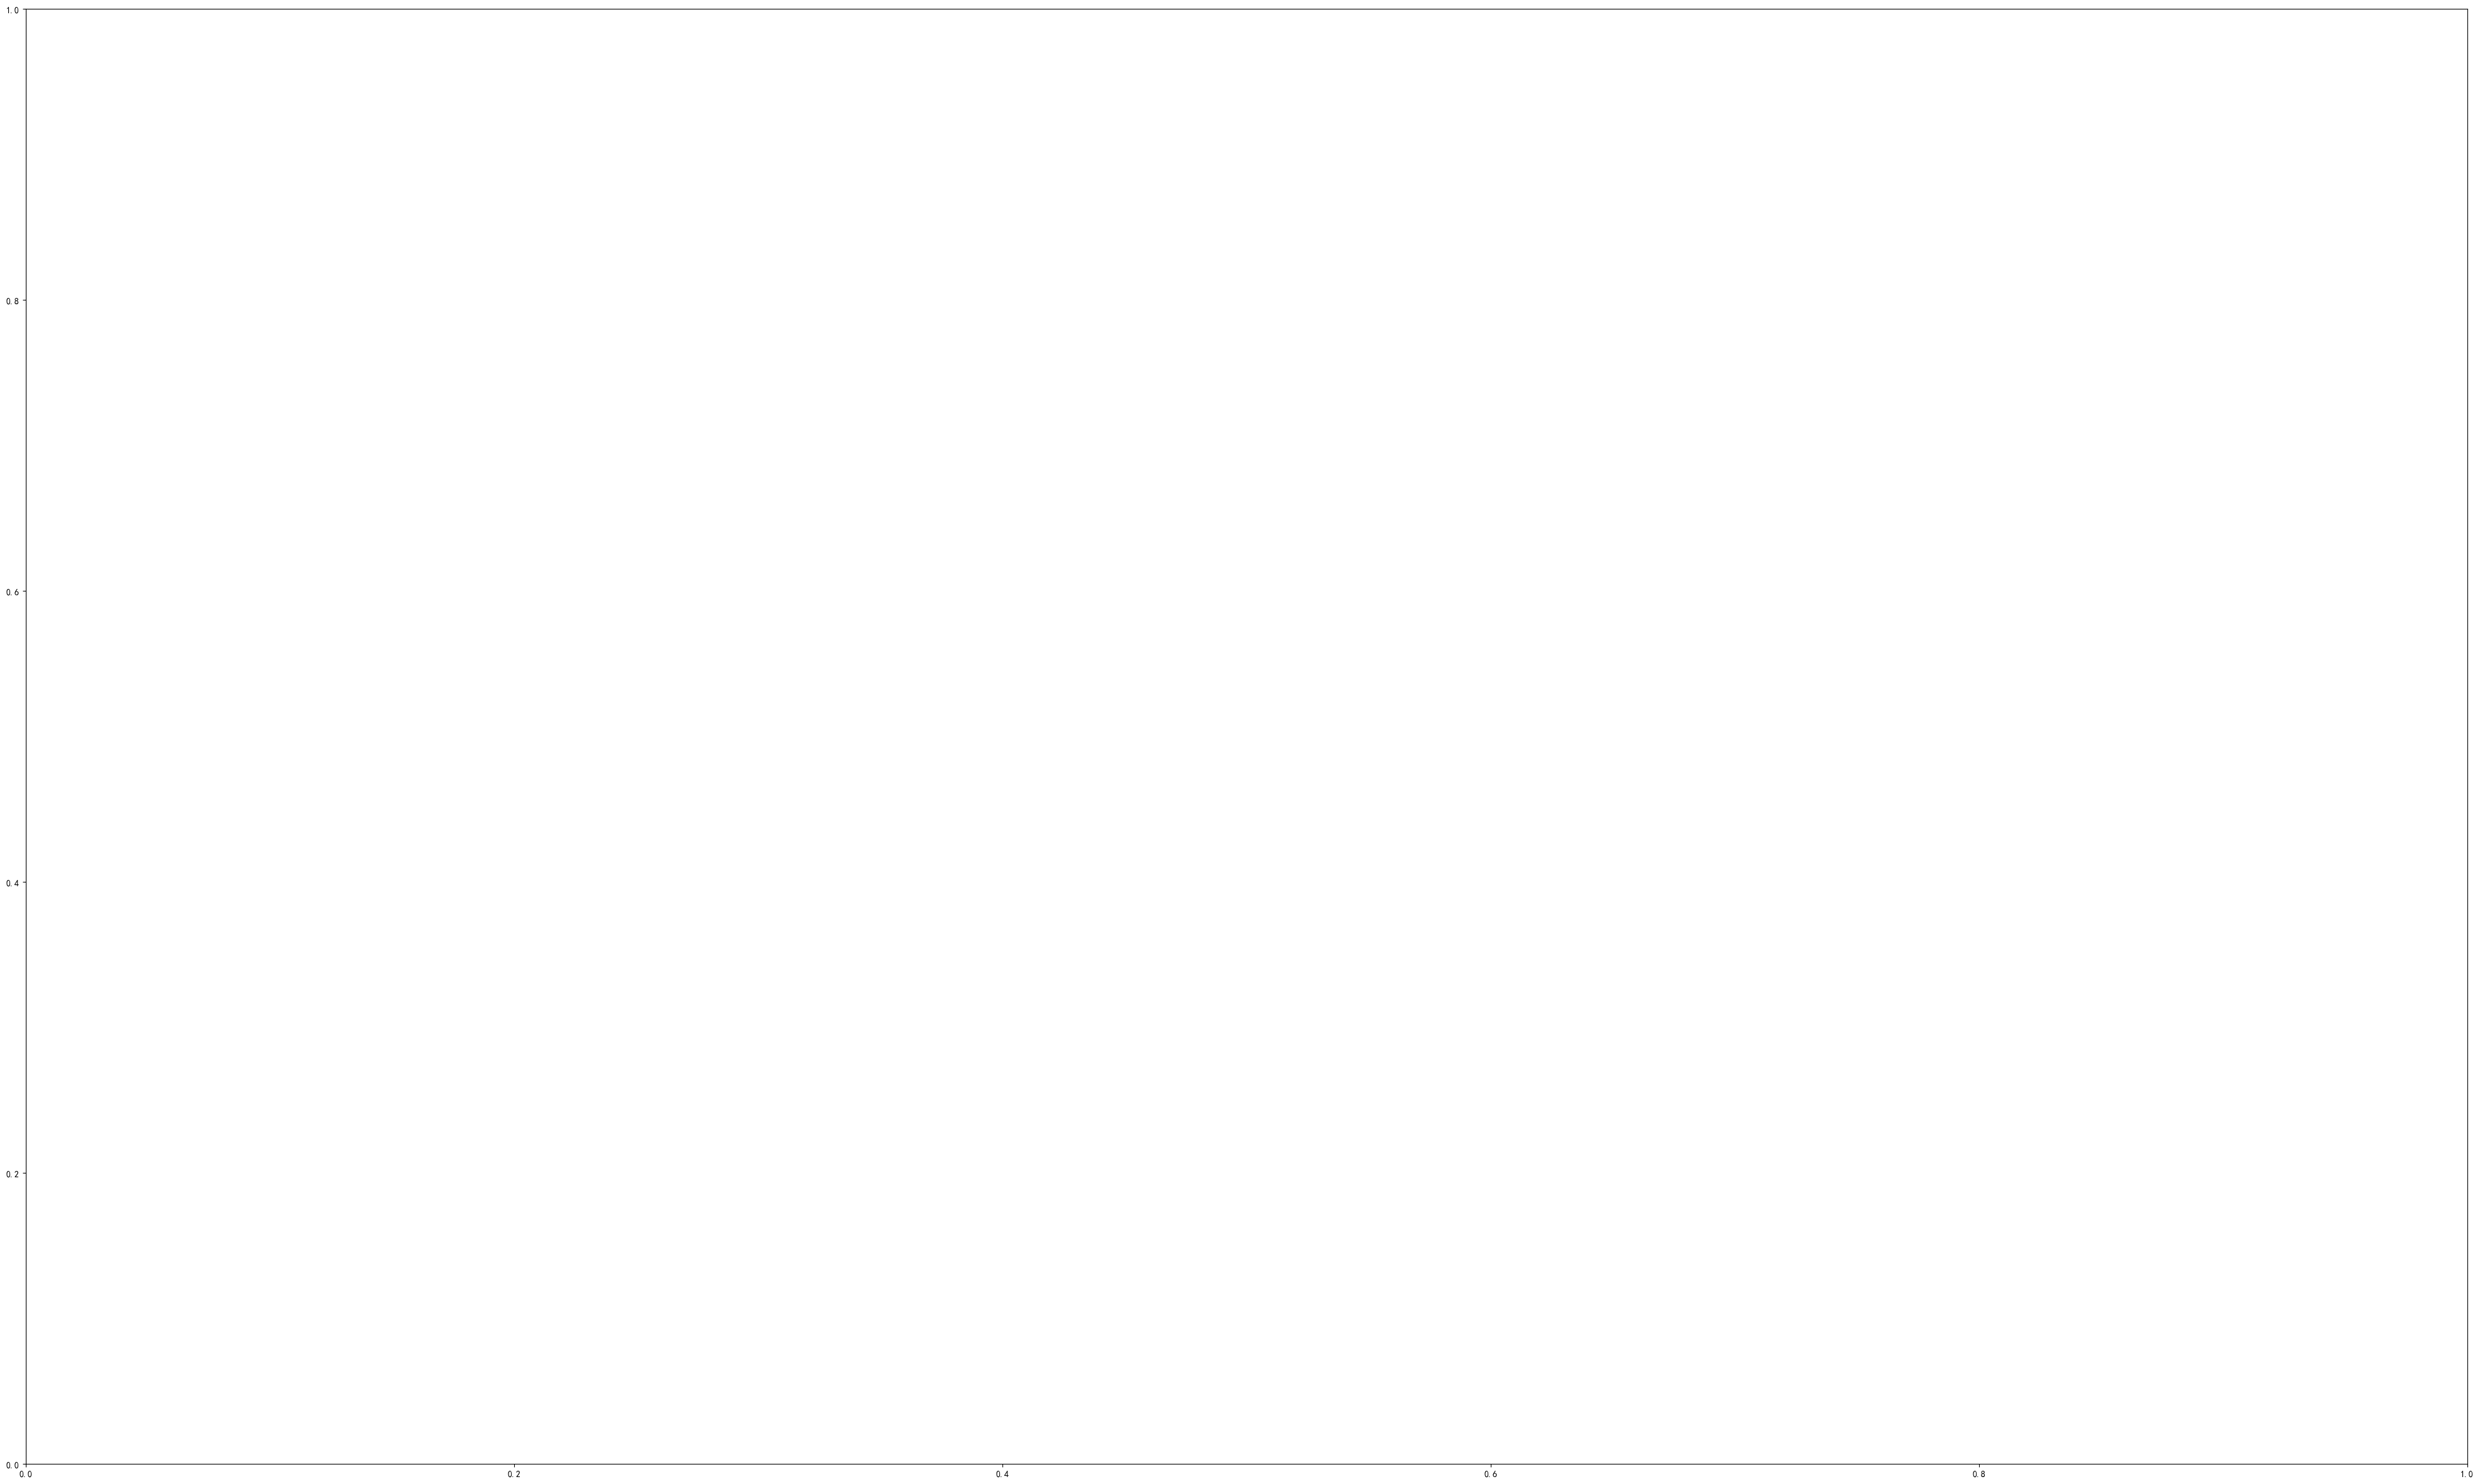

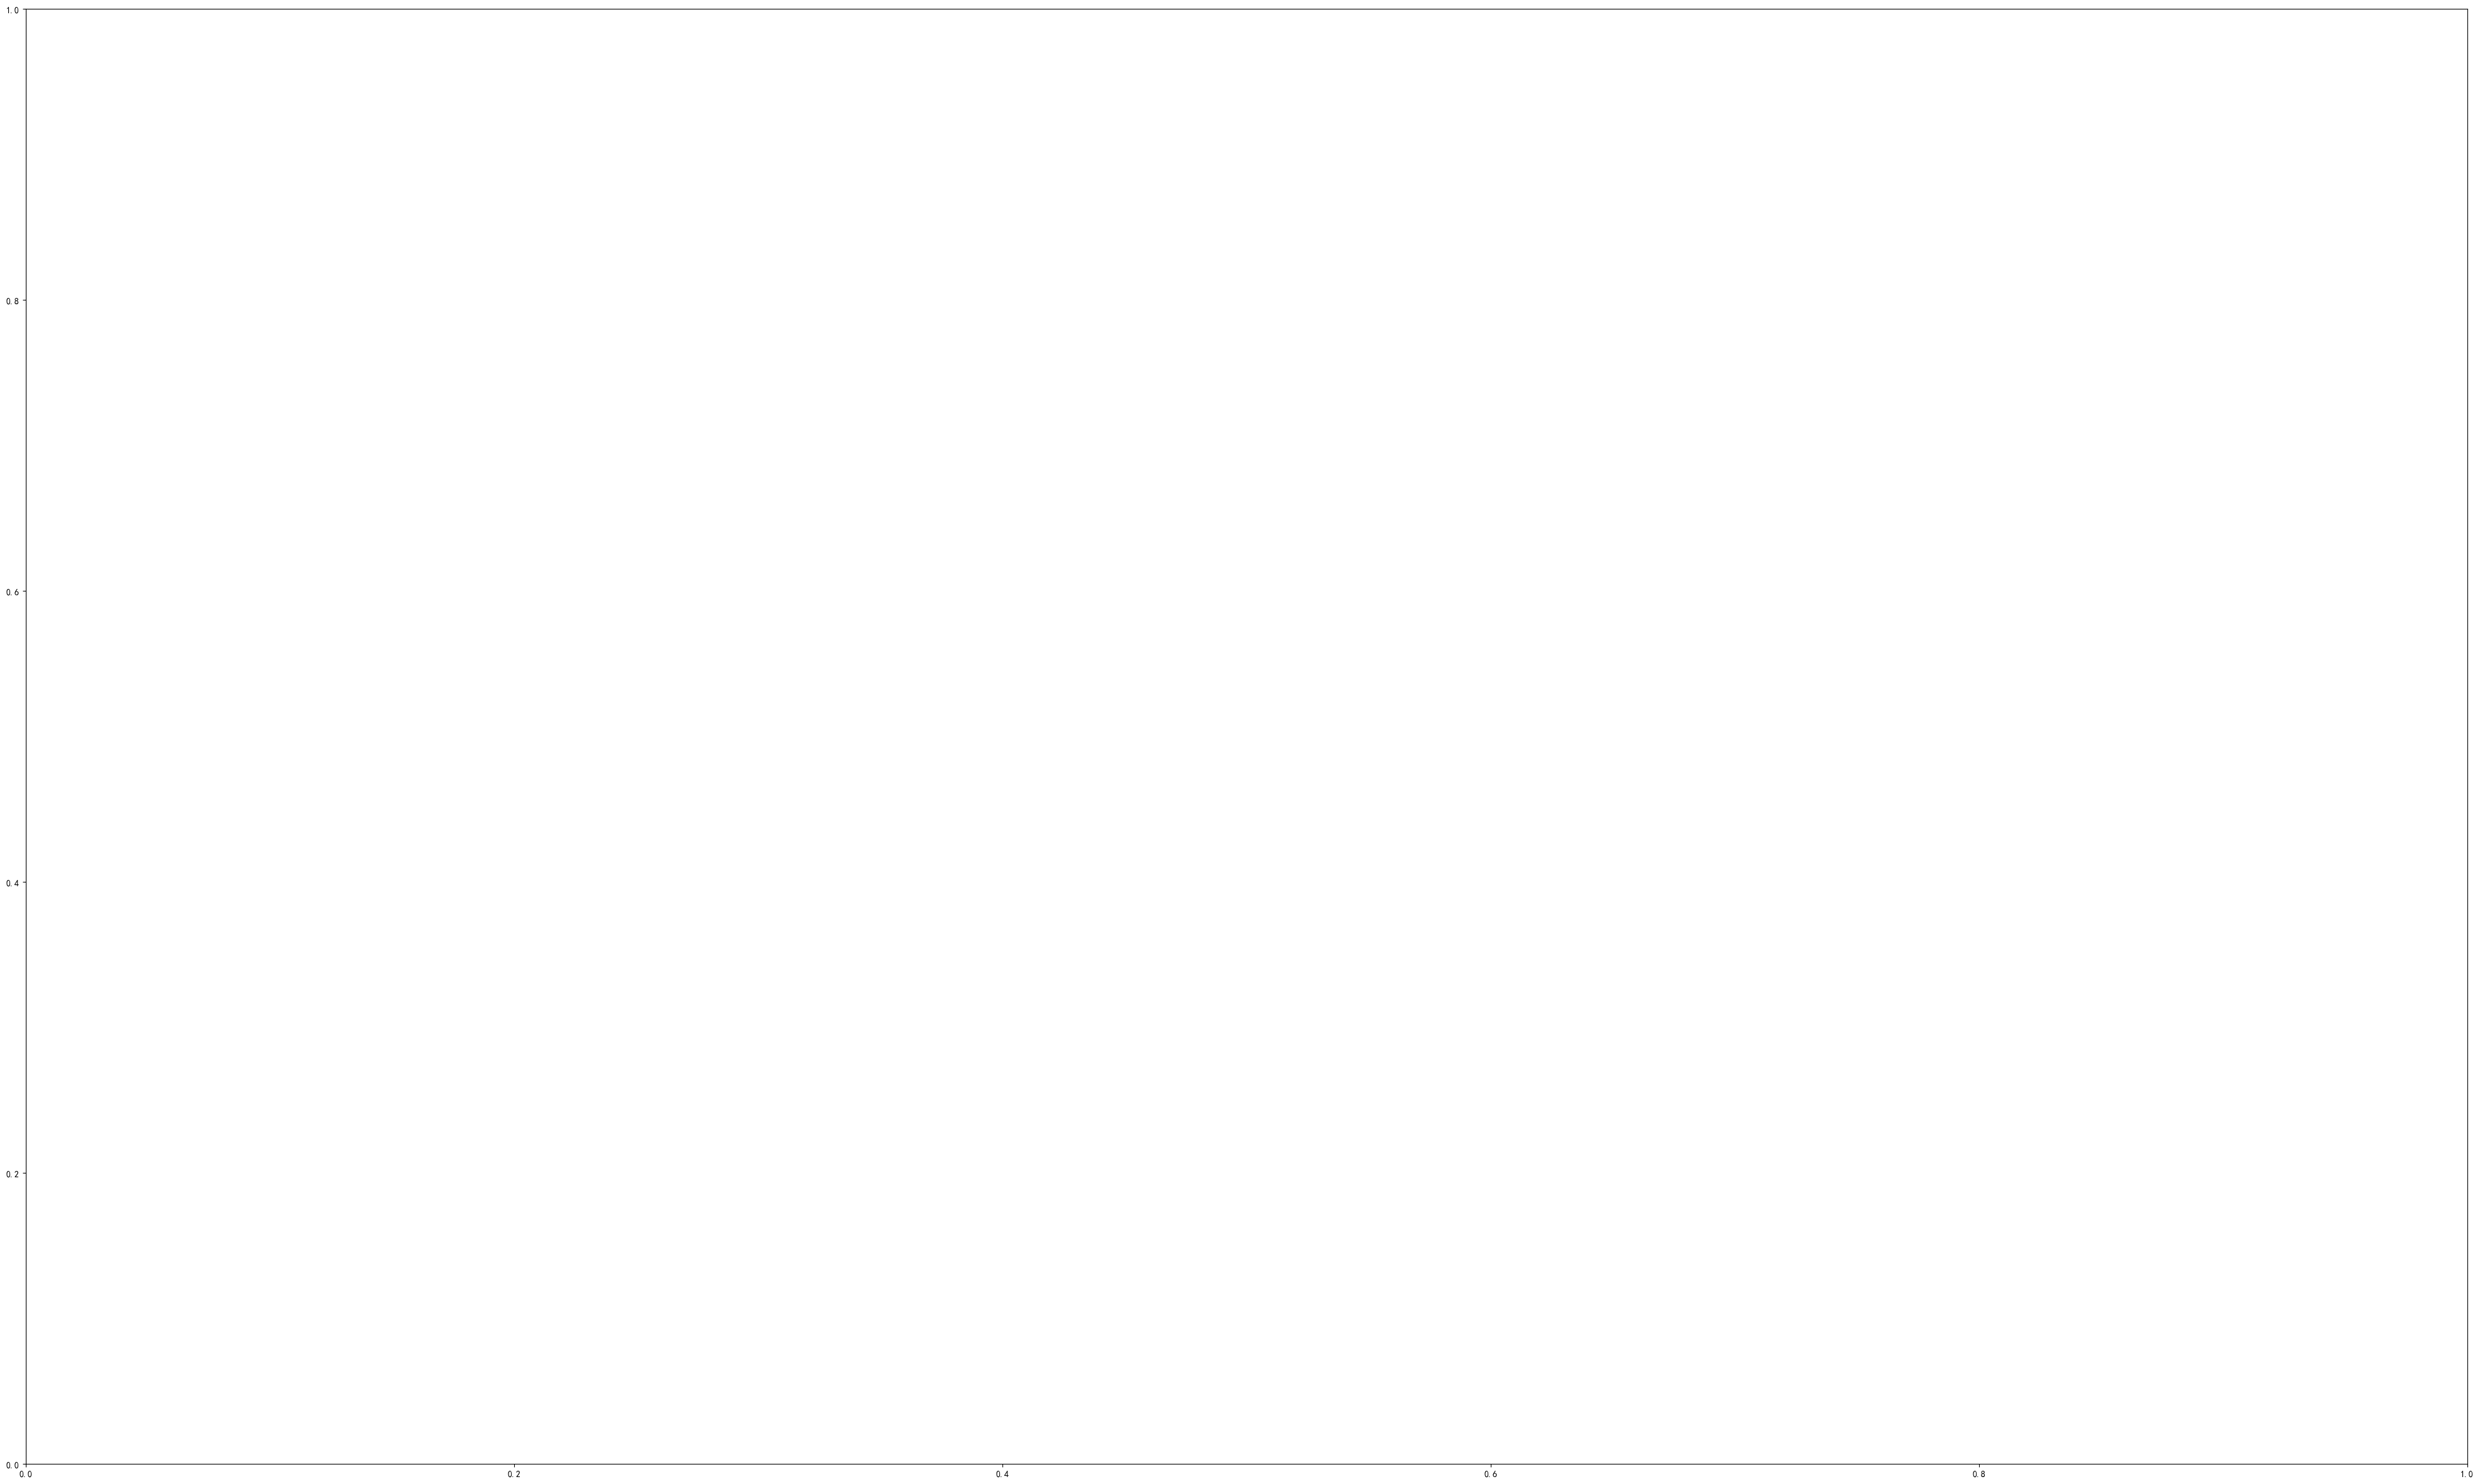

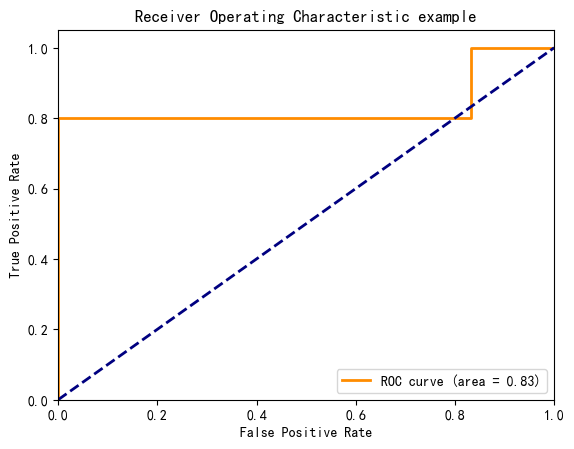

[0.         0.33512393 0.         0.03219038 0.         0.
 0.00398971 0.00374551 0.         0.         0.         0.03490015
 0.00071293 0.         0.07174835 0.13127491 0.         0.
 0.14342299 0.014972   0.00355172 0.00199798 0.         0.04077774
 0.         0.01305346 0.01442012 0.12311338 0.01637561 0.00369956
 0.         0.         0.         0.         0.         0.00255612
 0.00400636 0.         0.         0.         0.         0.
 0.         0.         0.         0.00436706]


D:\anaconda\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [10]:
import sys
!{sys.executable} -m pip install xgboost
import pandas as pd
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
import os
from sklearn.model_selection import GridSearchCV  #可以对模型参数进行网格搜索，此处没去用


# In[154]:


s1=pd.read_excel("E:\\0 团队 知识工程\\代码\\相关性、皮尔逊、xgboost\\变量指标5.xlsx",sheet_name='增加数据量1')


# In[155]:


Y=s1['y'] #选择Y值
X=s1.drop(['y','date1'],axis=1) #确定X值
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)#训练集和测试集7:3


# In[156]:


#此段已被注释掉
"""
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01,0.03,0.05,0.1, 0.2],
    'n_estimators':[100,200,300,400],
     'alpha': [0.1,0.2,0.3,0.4,0.5],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [2,3,4,5,6]
    
}
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(), param_grid=param_grid, scoring='roc_auc', cv=3)

# 执行网格搜索
grid_search.fit(x_train,y_train)

# 输出最佳参数和最佳得分
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
"""


# In[157]:


#模型训练
m1=xgb.XGBClassifier(learning_rate=0.01,max_depth=5,n_estimators=200,alpha=0.1,subsample=1.0)
m1.fit(x_train,y_train)


# In[158]:


#计算训练集AUC
yy_train1=m1.predict_proba(x_train)[:,1]
#FPR22,recall22,thresholds22 = roc_curve(y_test,yy,pos_label=1)
auc_train=roc_auc_score(y_train,yy_train1)
auc_train


# In[159]:


#计算训练集准确度，其实这个指标意义不大。比方说逾期坏样本总共占比才1%，不用模型瞎蒙都说是好样本，那准确性就有99%
m1.score(x_train,y_train)


# In[160]:


#计算训练集准确度
m1.score(x_test,y_test)


# In[161]:


#计算测试集AUC
yy=m1.predict_proba(x_test)[:,1]
#FPR22,recall22,thresholds22 = roc_curve(y_test,yy,pos_label=1)
auc=roc_auc_score(y_test,yy)
auc


# In[162]:


#画出auc曲线
fpr, tpr, hresholds =roc_curve(y_test,yy) #计算tpr、fpr
plt.rcParams['font.sans-serif'] = ['SimHei'] #设置能显示中文
plt.rcParams['axes.unicode_minus'] = False
# 绘制ROC曲线
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic example')
plt.legend(loc="lower right")
plt.show()


# In[163]:


print(m1.feature_importances_) #特征重要性，加起来为1


# In[151]:


xgb.plot_importance(m1, max_num_features=8) #最大的8个特征重要性


# In[164]:


#画出树图
digraph = xgb.to_graphviz(m1, num_trees=1,rankdir='LR')
digraph.format = 'png'
#digraph.body.insert(0, '\tnode [fontname="FangSong" shape=plaintext]')
digraph.view('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7') 

#下面这些代码都是为了让中文能够实现而加入的
with open('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7', 'r', encoding='utf-8') as file: 
    lines = file.readlines()

# 找到插入位置并插入新行
insert_index = 2  # 在第二行之后插入
new_line = 'node [fontname="FangSong" shape=plaintext]\n'
lines.insert(insert_index, new_line)



# 将修改后的内容写回文件
with open('C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7', 'w', encoding='utf-8') as file:
    file.writelines(lines)
os.system('dot -Tjpg C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view7 -o C:\\Users\\86136\\Desktop\\相关材料研究\\xgb_tree10\\xgb_view10.png')

训练集AUC: 0.9861
训练集准确度: 0.9600
测试集准确度: 0.8182
测试集AUC: 0.8333


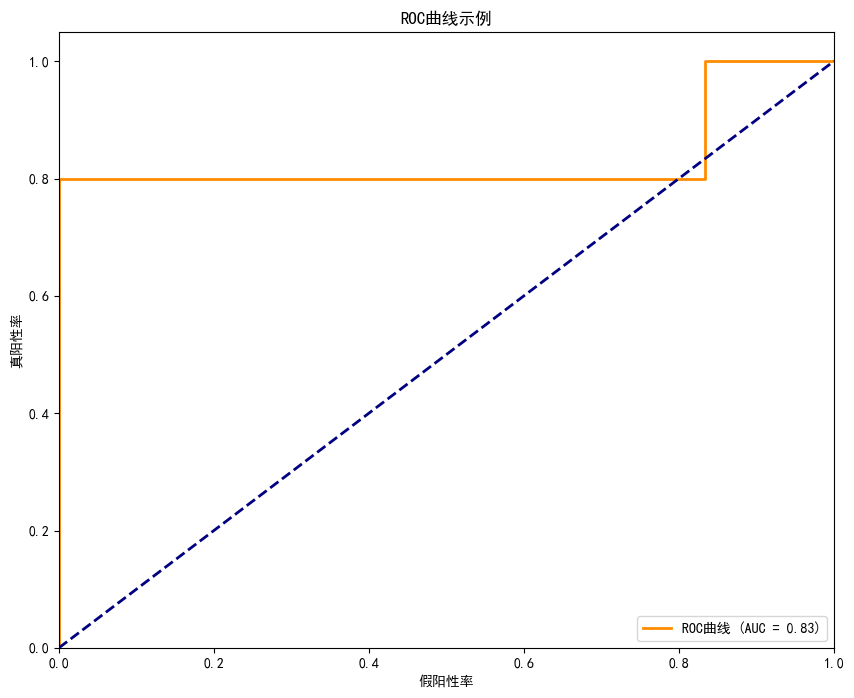


特征重要性:
基本每股收益(元): 0.0000
扣非每股收益(元): 0.3351
稀释每股收益(元): 0.0000
每股净资产(元): 0.0322
每股公积金(元): 0.0000
每股未分配利润(元): 0.0000
每股经营现金流(元): 0.0040
营业总收入(元): 0.0037
毛利润(元): 0.0000
归属净利润(元): 0.0000
扣非净利润(元): 0.0000
营业总收入同比增长(%): 0.0349
归属净利润同比增长(%): 0.0007
扣非净利润同比增长(%): 0.0000
营业总收入滚动环比增长(%): 0.0717
归属净利润滚动环比增长(%): 0.1313
扣非净利润滚动环比增长(%): 0.0000
净资产收益率(加权)(%): 0.0000
净资产收益率(扣非/加权)(%): 0.1434
总资产收益率(加权)(%): 0.0150
毛利率(%): 0.0036
净利率(%): 0.0020
预收账款/营业总收入: 0.0000
销售净现金流/营业总收入: 0.0408
经营净现金流/营业总收入: 0.0000
实际税率(%): 0.0131
流动比率: 0.0144
速动比率: 0.1231
现金流量比率: 0.0164
资产负债率(%): 0.0037
权益系数: 0.0000
产权比率: 0.0000
总资产周转天数(天): 0.0000
存货周转天数(天): 0.0000
应收账款周转天数(天): 0.0000
总资产周转率(次): 0.0026
存货周转率(次): 0.0040
应收账款周转率(次): 0.0000
流动比率.1: 0.0000
速动比率.1: 0.0000
资产负债率: 0.0000
周转天数: 0.0000
利润率: 0.0000
企业素质: 0.0000
净资产收益率ROE: 0.0000
现金比率: 0.0044


<Figure size 1000x600 with 0 Axes>

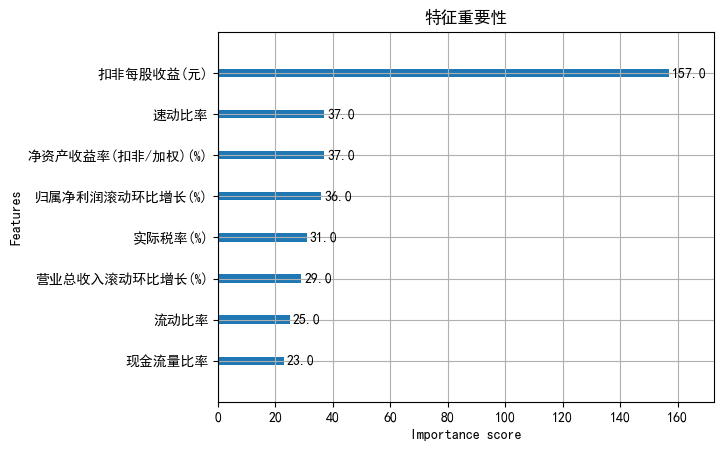

D:\anaconda\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

<Figure size 2000x1500 with 0 Axes>

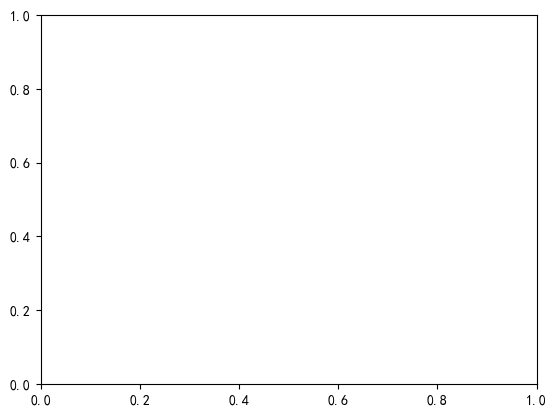

In [10]:
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 读取数据
s1 = pd.read_excel(r"E:\0 团队 知识工程\代码\相关性、皮尔逊、xgboost\变量指标5.xlsx", sheet_name='增加数据量1')

# 准备特征和目标变量
Y = s1['y']  # 选择Y值
X = s1.drop(['y', 'date1'], axis=1)  # 确定X值
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)  # 训练集和测试集7:3

# 模型训练
m1 = xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=200, alpha=0.1, subsample=1.0)
m1.fit(x_train, y_train)

# 计算训练集AUC
yy_train1 = m1.predict_proba(x_train)[:, 1]
auc_train = roc_auc_score(y_train, yy_train1)
print(f"训练集AUC: {auc_train:.4f}")

# 计算训练集准确度
train_accuracy = m1.score(x_train, y_train)
print(f"训练集准确度: {train_accuracy:.4f}")

# 计算测试集准确度
test_accuracy = m1.score(x_test, y_test)
print(f"测试集准确度: {test_accuracy:.4f}")

# 计算测试集AUC
yy = m1.predict_proba(x_test)[:, 1]
auc = roc_auc_score(y_test, yy)
print(f"测试集AUC: {auc:.4f}")

# 画出AUC曲线
fpr, tpr, thresholds = roc_curve(y_test, yy)
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label=f'ROC曲线 (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('ROC曲线示例')
plt.legend(loc="lower right")
plt.show()

# 显示特征重要性
print("\n特征重要性:")
for feature, importance in zip(X.columns, m1.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# 画出特征重要性图
plt.figure(figsize=(10, 6))
xgb.plot_importance(m1, max_num_features=8)  # 显示前8个重要特征
plt.title('特征重要性')
plt.show()

# 绘制XGBoost决策树（使用plot_tree替代graphviz）
plt.figure(figsize=(20, 15))  # 设置图像大小
xgb.plot_tree(m1, num_trees=0, rankdir='LR')  # 绘制第1棵树（索引从0开始）

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'WenQuanYi Micro Hei', 'Heiti TC']  # 尝试多种中文字体
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.rcParams['figure.dpi'] = 300  # 提高图像分辨率

plt.title('XGBoost决策树')
plt.tight_layout()  # 自动调整布局
plt.show()

In [9]:
%matplotlib inline 
import sys
!{sys.executable} -m pip install xgboost
import pandas as pd
import os  # 新增os模块处理路径问题
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import plot_tree

# 设置全局中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 自动创建保存目录（修改为当前目录下的output文件夹）
SAVE_DIR = "./output/"
os.makedirs(SAVE_DIR, exist_ok=True)  # 自动创建目录

# 数据准备
s1 = pd.read_excel("E:\\0 团队 知识工程\\代码\\相关性、皮尔逊、xgboost\\变量指标5.xlsx", sheet_name='增加数据量1')
Y = s1['y']
X = s1.drop(['y', 'date1'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

# 模型训练
m1 = xgb.XGBClassifier(
    learning_rate=0.01,
    max_depth=5,
    n_estimators=200,
    alpha=0.1,
    subsample=1.0
)
m1.fit(x_train, y_train)

# 特征重要性可视化
try:
    fig, ax = plt.subplots(figsize=(10, 8))
    xgb.plot_importance(m1, max_num_features=8, ax=ax)
    plt.title("特征重要性排名")
    plt.tight_layout()
    plt.savefig(os.path.join(SAVE_DIR, 'feature_importance.png'), dpi=300)
    plt.close()  # 关闭图形释放内存
    print(f"特征重要性图已保存至：{os.path.abspath(SAVE_DIR)}")
except Exception as e:
    print(f"保存特征重要性图时出错：{str(e)}")

# 决策树可视化（显示第一棵树）
# 修改后的决策树可视化部分
# 决策树可视化（显示第一棵树）
try:
    plt.rcParams.update({'figure.max_open_warning': 0})  # 解除图形数量限制
    
    # 创建超大画布
    plt.figure(figsize=(50, 30), dpi=100)
    ax = plt.gca()
    
    # 使用正确参数格式
    plot_tree(
        booster=m1,
        tree_idx=0,  # 改用新参数名
        rankdir='LR',
        ax=ax,
        condition_node_params={
            'shape': '"box"',  # 参数值用双引号包裹
            'color': '"#204a87"',
            'fillcolor': '"#729fcf"'
        },
        leaf_node_params={
            'shape': '"box"',
            'color': '"#4e9a06"',
            'fillcolor': '"#8ae234"'
        },
        graph_attrs={
            'rankdir': '"LR"',
            'max_depth': '"3"',  # 数值参数转为字符串
            'precision': '"2"'
        }
    )
    
    ax.axis('off')
    plt.tight_layout()
    
    # 显示前保存（解决Jupyter渲染冲突）
    plt.savefig(
        os.path.join(SAVE_DIR, 'tree_structure.png'),
        dpi=150,
        bbox_inches='tight',
        pad_inches=0.5
    )
    
    plt.show()  # 在保存后显示
    plt.close()

except Exception as e:
    print(f"可视化失败，原因：{str(e)}")
    print("终极解决方案：执行以下操作后重启内核")
    print("1. 安装graphviz：conda install -c conda-forge python-graphviz")
    print("2. 设置环境变量：os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'")

# ROC曲线绘制
try:
    fpr, tpr, _ = roc_curve(y_test, m1.predict_proba(x_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC曲线 (AUC = {roc_auc_score(y_test, m1.predict_proba(x_test)[:,1]):.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳率')
    plt.ylabel('真阳率')
    plt.title('ROC曲线')
    plt.legend(loc="lower right")
    plt.savefig(os.path.join(SAVE_DIR, 'roc_curve.png'), dpi=300)
    plt.close()
    print(f"ROC曲线图已保存至：{os.path.abspath(SAVE_DIR)}")
except Exception as e:
    print(f"保存ROC曲线图时出错：{str(e)}")

print("="*50)
print("所有输出结果将保存在当前工作目录的output文件夹中")
print(f"当前工作目录：{os.getcwd()}")
print("="*50)

特征重要性图已保存至：D:\jupyter\output
可视化失败，原因：failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH
终极解决方案：执行以下操作后重启内核
1. 安装graphviz：conda install -c conda-forge python-graphviz
2. 设置环境变量：os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
ROC曲线图已保存至：D:\jupyter\output
所有输出结果将保存在当前工作目录的output文件夹中
当前工作目录：D:\jupyter
